### (1.1) Expected reward when actions are uniformly choosen with uniform distribution
*  The first arm shall sample its reward uniformly from the interval [-1, 4). 
*  The second arm shall sample its reward uniformly from [2, 6). 
*  The third arm shall sample its reward uniformly from the interval [-2, 3). 
*  The fourth arm shall sample its reward uniformly from [5, 9). 
* The fifth arm shall sample its reward uniformly from [-3, 5). 
*  The sixth arm shall sample its reward uniformly from [1, 6).  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

arm_interval = [ (-1, 4), (2, 6), (-2, 3), (5, 9), (-3, 5), (1, 6) ]

action = [(a+b)/2 for a, b in arm_interval]

expected_reward = sum(action) / len(action)

print("Rewards of each arm:")
for i in range(len(arm_interval)):
    print(f"Arm {i+1}: {action[i]}")

print("Expected_reward", expected_reward)
print("The highest rewarded arm is:", action.index(max(action))+1)

Rewards of each arm:
Arm 1: 1.5
Arm 2: 4.0
Arm 3: 0.5
Arm 4: 7.0
Arm 5: 1.0
Arm 6: 3.5
Expected_reward 2.9166666666666665
The highest rewarded arm is: 4


### 1.2) Implement the six-armed bandit from 1.1) and compute the sample average reward for 20 uniformly chosen actions!  
* Compare this to your expectation from 1.1)! 

Average reward: 3.3884960790984167


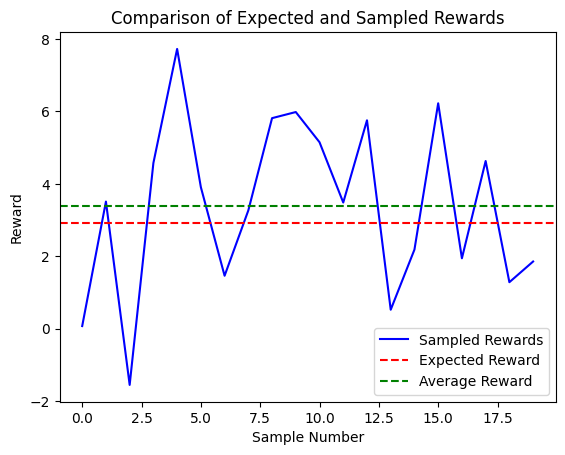

In [8]:
a = [lambda: np.random.uniform(-1, 4),
     lambda: np.random.uniform(2, 6),
     lambda: np.random.uniform(-2, 3),
     lambda: np.random.uniform(5, 9),
     lambda: np.random.uniform(-3, 5),
     lambda: np.random.uniform(1, 6)]

rewards = []

for i in range(20):
    arm = random.randint(0, 5)
    reward = a[arm]()
    rewards.append(reward)

avg_reward = sum(rewards) / len(rewards)
print("Average reward:", avg_reward)

# plot the comparision of expected reward and average reward
plt.plot(range(len(rewards)), rewards, label='Sampled Rewards', color='blue')
plt.axhline(y=expected_reward, color='r', linestyle='--', label='Expected Reward')
plt.axhline(y=avg_reward, color='g', linestyle='--', label='Average Reward')
plt.xlabel('Sample Number')
plt.ylabel('Reward')
plt.title('Comparison of Expected and Sampled Rewards')
plt.legend()
plt.show()

### 1.3) Initialize Q(ai)=0 and chose 2000 actions according to an ε-greedy selection strategy (ε=0.1)! 
* Update your action values by computing the sample average reward of each action recursively!  
* For every 100 actions show the percentage of choosing arm 1, arm 2, arm 3, arm 4, arm 5, and arm 6 as well as the resulting average reward!

Step 100:
  Arm %: [21. 43.  3. 24.  2.  7.]
  Avg Reward: 4.01

Step 200:
  Arm %: [11.  22.   2.  58.   2.5  4.5]
  Avg Reward: 5.23

Step 300:
  Arm %: [ 7.33 15.33  2.33 68.33  3.    3.67]
  Avg Reward: 5.69

Step 400:
  Arm %: [ 6.25 11.5   2.   74.5   2.5   3.25]
  Avg Reward: 5.88

Step 500:
  Arm %: [ 5.2  9.8  1.8 77.8  2.4  3. ]
  Avg Reward: 6.02

Step 600:
  Arm %: [ 4.5   8.17  1.67 80.83  2.17  2.67]
  Avg Reward: 6.14

Step 700:
  Arm %: [ 4.    7.43  1.86 81.71  2.43  2.57]
  Avg Reward: 6.15

Step 800:
  Arm %: [ 3.75  6.75  1.62 83.    2.38  2.5 ]
  Avg Reward: 6.22

Step 900:
  Arm %: [ 3.44  6.    1.56 84.    2.33  2.67]
  Avg Reward: 6.27

Step 1000:
  Arm %: [ 3.3  5.5  1.7 84.6  2.3  2.6]
  Avg Reward: 6.29

Step 1100:
  Arm %: [ 3.    5.    1.64 85.45  2.18  2.73]
  Avg Reward: 6.33

Step 1200:
  Arm %: [ 2.75  4.75  1.58 86.17  2.17  2.58]
  Avg Reward: 6.37

Step 1300:
  Arm %: [ 2.54  4.69  1.46 86.54  2.23  2.54]
  Avg Reward: 6.37

Step 1400:
  Arm %: [ 2.4

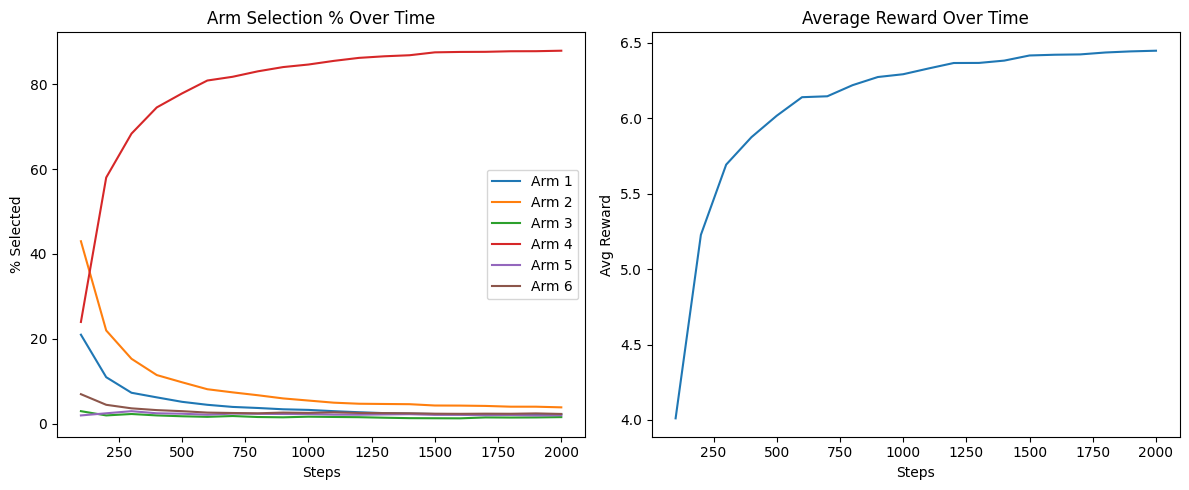

In [ ]:

arms = [
    lambda: np.random.uniform(-1, 4),   
    lambda: np.random.uniform(2, 6),   
    lambda: np.random.uniform(-2, 3),   
    lambda: np.random.uniform(5, 9),    
    lambda: np.random.uniform(-3, 5),   
    lambda: np.random.uniform(1, 6)    
]

n_arms = len(arms)
n_steps = 2000
epsilon = 0.1

Q = np.zeros(n_arms)  # Q(a_i) = 0 initially
N = np.zeros(n_arms)  # Counts of each action
total_reward = 0
avg_rewards = []
arm_percentages = []  # Stores % of arm selections /100 steps

for step in range(1, n_steps + 1):
    if np.random.random() < epsilon:
        action = np.random.randint(n_arms)  # Random exploration
    else:
        action = np.argmax(Q)  # Exploit best-known action
    
    reward = arms[action]()
    total_reward += reward
    
    N[action] += 1
    Q[action] += (reward - Q[action]) / N[action]
    
    if step % 100 == 0:
        avg_reward = total_reward / step
        avg_rewards.append(avg_reward)
        
        
        percentages = (N / step) * 100
        arm_percentages.append(percentages)
        print(f"Step {step}:")
        print(f"  Arm %: {percentages.round(2)}")
        print(f"  Avg Reward: {avg_reward:.2f}\n")

# Plot results
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(np.arange(100, n_steps + 1, 100), arm_percentages)
plt.title("Arm Selection % Over Time")
plt.xlabel("Steps")
plt.ylabel("% Selected")
plt.legend([f"Arm {i+1}" for i in range(n_arms)])

# Plot average reward
plt.subplot(1, 2, 2)
plt.plot(np.arange(100, n_steps + 1, 100), avg_rewards)
plt.title("Average Reward Over Time")
plt.xlabel("Steps")
plt.ylabel("Avg Reward")

plt.tight_layout()
plt.show()

### 1.4) Redo the experiment, but after 1000 steps sample the rewards of the fourth arm uniformly from [-4, 3) !
* Compare updating action values by computing the sample average reward of each action recursively (as done in 1.3) with using a constant learning rate α=0.05 ! 
*  For every 100 actions show the percentage of choosing arm 1, arm 2, arm 3, arm 4, arm 5, and arm 6 as well as the resulting average reward!  

* Modify Arm 4's reward distribution after 1000 steps.
* Compare sample-average updates vs constant learning rate (α = 0.05).

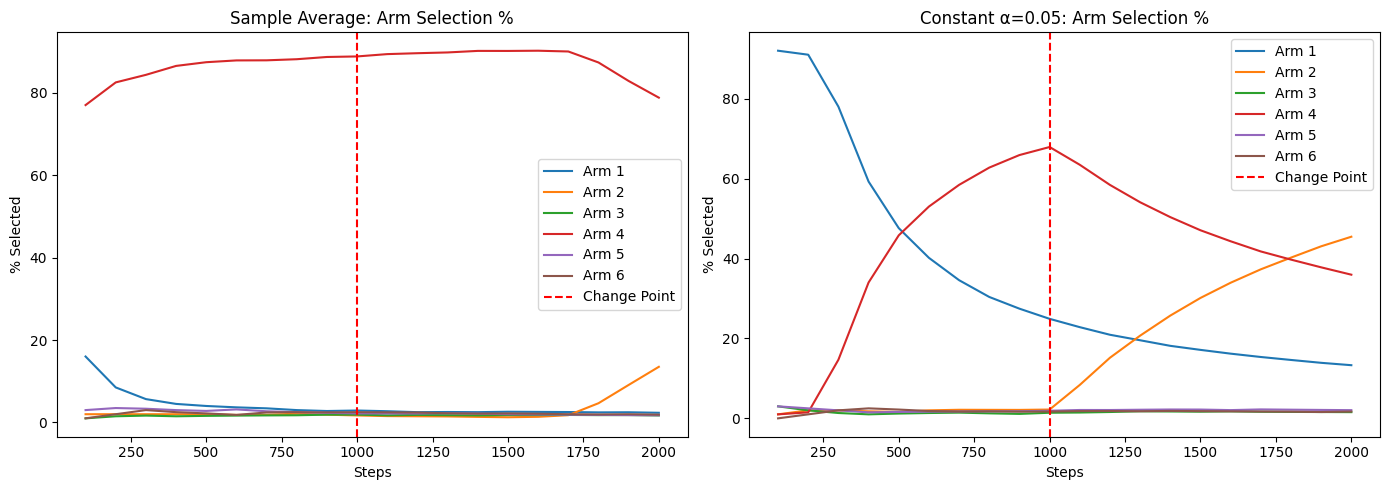

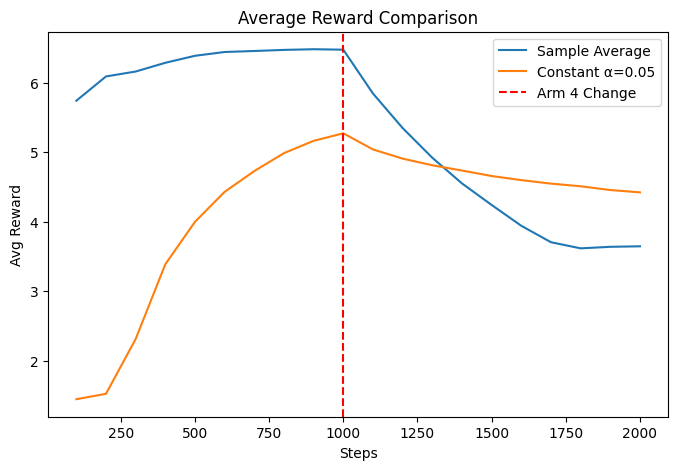

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define arms (Arm 4 is dynamic)
def arm4_reward(step):
    return np.random.uniform(5, 9) if step <= 1000 else np.random.uniform(-4, 3)

arms = [
    lambda: np.random.uniform(-1, 4),    # Arm 1
    lambda: np.random.uniform(2, 6),     # Arm 2
    lambda: np.random.uniform(-2, 3),   # Arm 3
    lambda step: arm4_reward(step),      # Arm 4 (non-stationary)
    lambda: np.random.uniform(-3, 5),    # Arm 5
    lambda: np.random.uniform(1, 6)      # Arm 6
]

n_arms = len(arms)
n_steps = 2000
epsilon = 0.1

# Initialize for both methods
def run_experiment(use_constant_alpha=False):
    Q = np.zeros(n_arms)
    N = np.zeros(n_arms)
    total_reward = 0
    avg_rewards = []
    arm_percentages = []
    alpha = 0.05 if use_constant_alpha else None

    for step in range(1, n_steps + 1):
        # ε-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.randint(n_arms)
        else:
            action = np.argmax(Q)
        
        # Get reward (Arm 4 depends on step)
        reward = arms[action](step) if action == 3 else arms[action]()
        total_reward += reward

        # Update Q(a)
        N[action] += 1
        if use_constant_alpha:
            Q[action] += alpha * (reward - Q[action])  # Constant α
        else:
            Q[action] += (reward - Q[action]) / N[action]  # Sample average

        # Log every 100 steps
        if step % 100 == 0:
            avg_rewards.append(total_reward / step)
            percentages = (N / step) * 100
            arm_percentages.append(percentages)
    
    return avg_rewards, arm_percentages

# Run both experiments
avg_rewards_sample, arm_percentages_sample = run_experiment(use_constant_alpha=False)
avg_rewards_alpha, arm_percentages_alpha = run_experiment(use_constant_alpha=True)

# Plot results
steps = np.arange(100, n_steps + 1, 100)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(steps, arm_percentages_sample)
plt.axvline(x=1000, color='r', linestyle='--', label='Arm 4 Change')
plt.title("Sample Average: Arm Selection %")
plt.xlabel("Steps")
plt.ylabel("% Selected")
plt.legend([f"Arm {i+1}" for i in range(n_arms)] + ["Change Point"])


plt.subplot(1, 2, 2)
plt.plot(steps, arm_percentages_alpha)
plt.axvline(x=1000, color='r', linestyle='--', label='Arm 4 Change')
plt.title("Constant α=0.05: Arm Selection %")
plt.xlabel("Steps")
plt.ylabel("% Selected")
plt.legend([f"Arm {i+1}" for i in range(n_arms)] + ["Change Point"])

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(steps, avg_rewards_sample, label="Sample Average")
plt.plot(steps, avg_rewards_alpha, label="Constant α=0.05")
plt.axvline(x=1000, color='r', linestyle='--', label='Arm 4 Change')
plt.title("Average Reward Comparison")
plt.xlabel("Steps")
plt.ylabel("Avg Reward")
plt.legend()
plt.show()

### 1.5) Modify the experiment from 1.4) by using an optimistic initialization Q(ai)=10 and a greedy action selection strategy, still using a constant learning rate α=0.05 !  

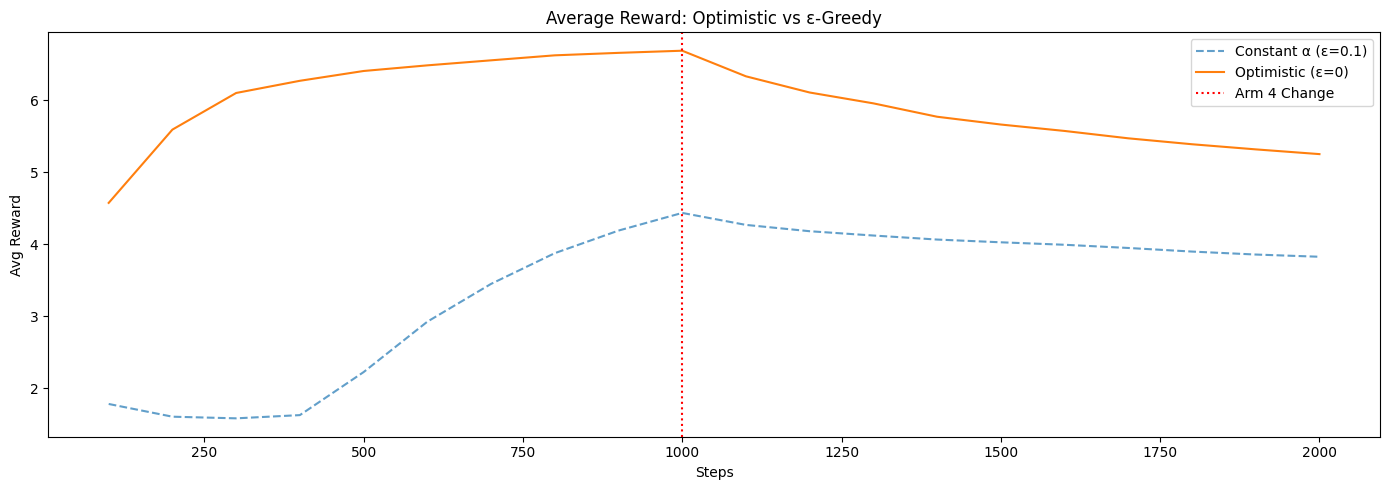

In [19]:
def arm4_reward(step):
    return np.random.uniform(5, 9) if step <= 1000 else np.random.uniform(-4, 3)

def run_optimistic_experiment():
    Q = np.full(n_arms, 10.0)  # Optimistic initialization
    N = np.zeros(n_arms)
    total_reward = 0
    avg_rewards = []
    arm_percentages = []
    alpha = 0.05  # Constant learning rate

    for step in range(1, n_steps + 1):
        # Greedy action selection (no ε)
        action = np.argmax(Q)
        
        # Get reward (Arm 4 depends on step)
        reward = arms[action](step) if action == 3 else arms[action]()
        total_reward += reward

        # Update Q(a) with constant α
        N[action] += 1
        Q[action] += alpha * (reward - Q[action])

        # Log every 100 steps
        if step % 100 == 0:
            avg_rewards.append(total_reward / step)
            percentages = (N / step) * 100
            arm_percentages.append(percentages)
    
    return avg_rewards, arm_percentages


# Run optimistic experiment
avg_rewards_opt, arm_percentages_opt = run_optimistic_experiment()

# Plot comparison with constant α from 1.4
plt.figure(figsize=(14, 5))

# # Arm selection % comparison
# plt.subplot(1, 2, 1)
# plt.plot(steps, arm_percentages_alpha, linestyle='--', alpha=0.7, label="Constant α (ε=0.1)")
# plt.plot(steps, arm_percentages_opt, label="Optimistic (ε=0)")
# plt.axvline(x=1000, color='r', linestyle=':', label='Arm 4 Change')
# plt.title("Arm Selection %: Optimistic vs ε-Greedy")
# plt.xlabel("Steps")
# plt.ylabel("% Selected")
# plt.legend()

# # Average reward comparison
# plt.subplot(1, 2, 2)
plt.plot(steps, avg_rewards_alpha, linestyle='--', alpha=0.7, label="Constant α (ε=0.1)")
plt.plot(steps, avg_rewards_opt, label="Optimistic (ε=0)")
plt.axvline(x=1000, color='r', linestyle=':', label='Arm 4 Change')
plt.title("Average Reward: Optimistic vs ε-Greedy")
plt.xlabel("Steps")
plt.ylabel("Avg Reward")
plt.legend()

plt.tight_layout()
plt.show()